In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("datasets/beak-length-width.csv")

EDA of beak depths of Darwin's finches
For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called df with columns 'year' and 'beak_depth'. The units of beak depth are millimeters (mm).

<AxesSubplot:xlabel='year', ylabel='beak_depth'>

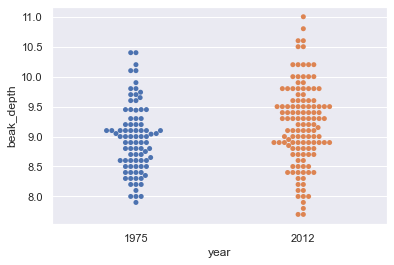

In [3]:
sns.swarmplot(x='year',y='beak_depth',data=df)

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

## ECDF

In [4]:
def ecdf(data1):
    sorted=np.sort(data1)
    length=len(data1)
    
    y=np.arange(1,length+1)/length
    
    return sorted , y

In [5]:
x_1975, y_1975 = ecdf(df[df['year']==1975]['beak_depth'])
x_2012, y_2012 = ecdf(df[df['year']==2012]['beak_depth'])

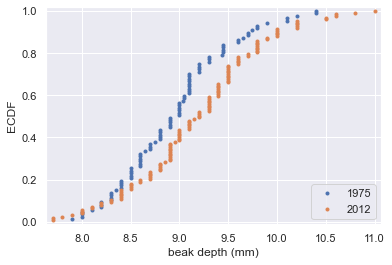

In [6]:
# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

## Parameter estimates of beak depths ,CONFIDENCE INTERVAL
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a <font color="red"> 95% </font>confidence interval.

#### function to bootstraing the samples and calculating its mean

In [7]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [8]:
bd_2012=df[df['year']==2012]['beak_depth']
bd_1975=df[df['year']==1975]['beak_depth']

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012)-np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012-bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06336558 0.39200846] mm


### Hypothesis test: Are beaks deeper in 2012?
The plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [9]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = (bd_1975-np.mean(bd_1975))+combined_mean
bd_2012_shifted = (bd_2012-np.mean(bd_2012))+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates=bs_replicates_2012-bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= np.mean(bd_2012)-np.mean(bd_1975)) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0046


We get a p-value of 0.0027, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

In [10]:
bl_1975=df[df['year']==1975]['beak_length']
bl_2012=df[df['year']==2012]['beak_length']

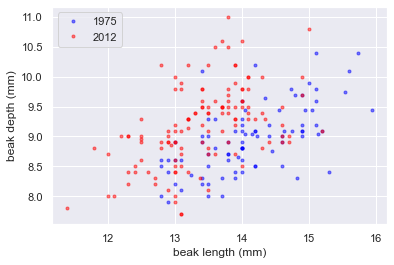

In [11]:
# Make scatter plot of 1975 data

_ =plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color="blue", alpha=0.5)

# Make scatter plot of 2012 data
_ =plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color="red", alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## Function to calculate multiple regression line using bootstrap sampling technique to produce multiple lines.

In [12]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [13]:
len(bd_1975)

87

In [14]:
len(bd_2012)

127

In [15]:
len(bd_2012)

127

In [16]:
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)
print(slope_2012, intercept_2012)

0.462630358835313 2.9772474982360198


In [19]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
        
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012,bd_2012,1000)
        

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
#slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
    'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
     'conf int =', intercept_conf_int_2012)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 5, 54, 57, 68, 77,\n            ...\n            84, 31, 26, 57, 13],\n           dtype='int64', length=94). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

2012: slope = 0.462630358835313 conf int = [0.33137479 0.60695527]

2012: intercept = 2.977247498236019 conf int = [1.06792753 4.70599387]

NameError: name 'bs_slope_reps_2012' is not defined

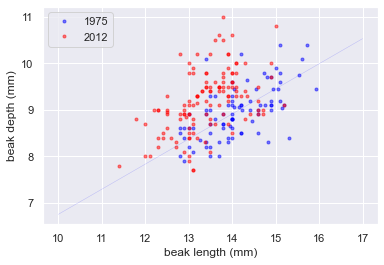

In [18]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x,bs_slope_reps_1975[i]*x+ bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color="blue")
    plt.plot(x, bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color="red")

# Draw the plot again
plt.show()